# **EE214 Machine Learning Basics and Practices**

- You should fill in all the blanks and follow all the TODO list in this file. 

- You don't need to annotate on your code. But please write descriptions of your source code and answers to the given questions in the report. There is no limit to the format of your report.

- You should **submit both the ipynb file and the report**. **Otherwise, you can't get a full score.**

- The name of zip file should be "**studentID_Name**.zip". You can submit it through KLMS. **Submission due is 5/15(Mon) 11:59 p.m.**

- Our late submission penalty is as follows:

    **0 hours ~ 3 hours: 90%**

    **3 hours ~ 6 hours: 80%**

    **6 hours ~ 12 hours: 70%**

    **12 hours ~ 24 hours: 50%**

    **24 hours ~ : 0%**

- If you have further questions, please let TAs know




20200045 김건우

## **Mini-Assignment 2**



## **Part 1.** Implement K-means & DBSCAN algorithm using Numpy

## **Part 1-1.** Implement K-means clustering algorithm


In [67]:
import matplotlib.pyplot as plt
import numpy as np
import time

## **TODO** : Fill in the blanks of the codes and write your own description of the source code in your report.

In [72]:
class KMeans:
    
    def __init__(self, n_clusters=1, random_state=300):
        '''
        parameter:
        n_clusters: desired number of clusters
        random_state: random state for initializing the centroids
        '''
        assert n_clusters >= 1
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.cluster_centers_ = None    # cluster centers (=centriods) will be initialized in 'fit' method
    
    
    def fit(self, X):
        '''
        parameter:
        X: data
        shape of X: (number of sample, feature dimensions)
        
        Compute the centroids that can achieve the minimum variance within clusters given a (training) data X.
        Clustering is performed iteratively until the centroids are not changed, i.e., until the optimum is reached.
        The centroids obtained here; "self.cluster_centers_" will be used in "predict" method.
        
        It returns a array of cluster labels for data X.
        For each sample in X, the cluster label means the index of the nearest center among centers in self.cluster_centers_. Thus, the cluster labels range from 0 to (n_clusters-1).
        
        Return:
        cluster_labels: numpy array of cluster labels for all data samples in X
        '''
        
        # Here, the centroids is initialized with arbitrary samples of X.
        np.random.seed(self.random_state)  # the choice of these random samples is governed by the "self.random_state".
        initial_cluster_centers_idx = np.random.choice(len(X), self.n_clusters, replace=False) # choose the 'n_clusters' number of samples in X to take them as initial centriods
        self.cluster_centers_ = X[initial_cluster_centers_idx]  # initial centroids
        
        # fill in the blank --------------------------------------
        n = len(X) # or X.shape[0], 전체 데이터 개수
        dim = X.shape[1]
        while(1):
            distance_arr = np.linalg.norm(X-self.cluster_centers_[0], 2, axis =1)    # 각 클러스터까지의 거리
            for i in range(self.n_clusters-1):
                distance_arr1 = np.linalg.norm(X-self.cluster_centers_[i+1], 2, axis =1)
                distance_arr = np.column_stack((distance_arr,distance_arr1))
            new_labels = distance_arr.argmin(axis=1)
            # var를 최소로 하는 새로운 center를 찾는다
            new_center = np.zeros([self.n_clusters,dim]) #initialize
            num_of_dot = np.zeros(self.n_clusters)

            for k,item in enumerate(new_labels):
                new_center[item]+=X[k]
                num_of_dot[item]+=1
            for j in range(self.n_clusters):
                new_center[j] = new_center[j]/num_of_dot[j]
            # 기존 center랑 비교한다
            if (new_center == self.cluster_centers_).all():
                break
            else:
                self.cluster_centers_ = new_center
            # 같으면 out, 다르면 반복
            # --------------------------------------------------------    
            
                
        cluster_labels = new_labels
        return cluster_labels
    
    
    def predict(self, X):
        '''
        parameter:
        X: data
        shape of X: (number of sample, feature dimensions)
        
        For each sample in the data X (might be testset), predict the cluster using the centroids obtained from "fit" method.
        It returns an array of cluster labels for data X.
        
        Return:
        cluster_labels: numpy array of cluster labels for all data samples in X (testset)
        '''
        assert self.cluster_centers_ is not None
        
        # fill in the blank --------------------------------------
        dim = X.shape[1] #데이터의 차원 수
        distance_arr = np.linalg.norm(X-self.cluster_centers_[0], 2, axis =1)    # 각 클러스터까지의 거리 np.array
        for i in range(dim-1):
            distance_arr1 = np.linalg.norm(X-self.cluster_centers_[i+1], 2, axis =1)
            distance_arr = np.column_stack((distance_arr,distance_arr1))
        cluster_labels = distance_arr.argmin(axis=1)
        # --------------------------------------------------------    
        
        return cluster_labels

## **TODO** : Run the test code for blobs dataset below and attach the results in the report.



**Do not edit the testcode below**

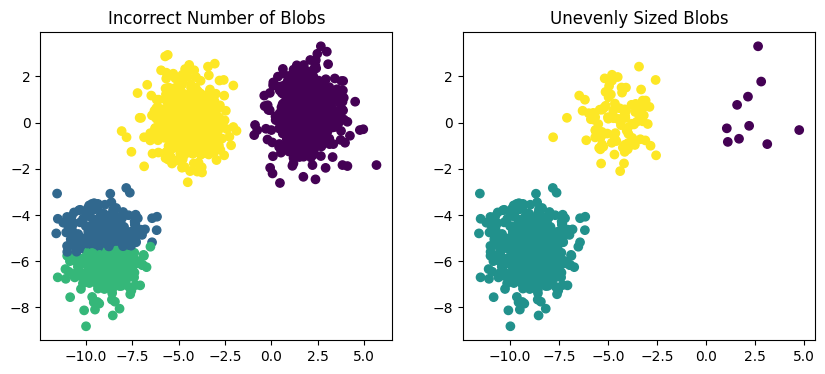

In [69]:
# Testcode

from sklearn.datasets import make_blobs

plt.figure(figsize=(10, 4))

n_samples = 1500
X, y = make_blobs(n_samples=n_samples, random_state=170)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=4).fit(X)

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3).fit(X_filtered)

plt.subplot(122)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

## **TODO** : Try to run K-means algorithm with various random_state values in initializing centroids and attach the results in the report. Describe your observations as well as the reason why this happens.

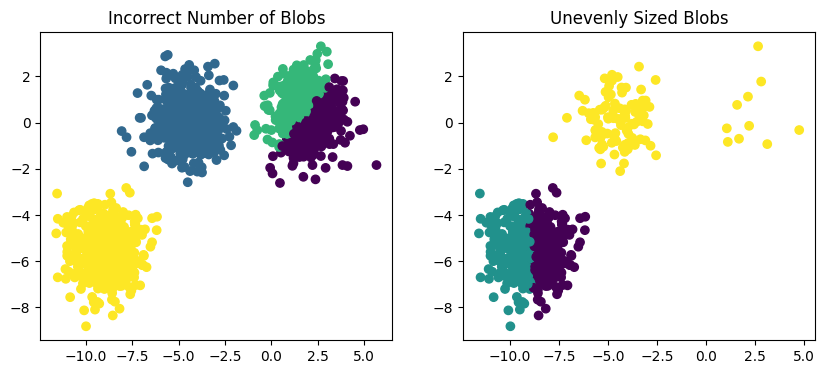

In [73]:
# Testcode

from sklearn.datasets import make_blobs

plt.figure(figsize=(10, 4))

n_samples = 1500
X, y = make_blobs(n_samples=n_samples, random_state=170)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=4).fit(X)

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3).fit(X_filtered)

plt.subplot(122)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

## **Part 1-2.** Implement DBSCAN algorithm


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import metrics
from sklearn.datasets import make_blobs

## **TODO** : Fill in the blanks of the codes and write your own description of the source code in your report.



In [2]:
import random

In [62]:
class DBSCAN:

    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples

    def fit_predict(self, X):
        '''
        parameter:
        X: data
        shape of X: (number of sample, feature dimensions)

        It returns a array of cluster labels for each sample point. 
        Here, the cluster labels are numbered starting from 1. 
        Moreover, "-1" means noise.
        '''
        self.X = X
        self.cluster_labels = np.zeros((len(X)))              # Initialize all the cluster labels as 0
        self.current_label = 0
        self.labeled_indices = set()                          # for tracking all visited(already labeled) points
        self.core_sample_indices_ = []                        # for tracking all core samples (for future visualization)

        # declare something if you think you need ------------
        
        # ----------------------------------------------------

        while np.any(self.cluster_labels == 0):               # repeat until there's no point that has not been visited any more 레이블이 0인 점 = 아직 돌지 않음
            p_idx = self.pick_arbitrary_point()               # pick arbitrary point among points that are not visited so far (fill the blanks for "pick_arbitrary_point" below)
            if self.is_core_sample(p_idx):                    # check if it is core sample (fill the blanks for "is_core_sample" below)
                self.current_label += 1                       # define new cluster label for current visiting
                self.visit_all_successive_neighbors(p_idx)    # visit all the neighbors and label them in succession (fill the blanks for "visit_all_successive_neighbors" below) how about boder point?
            else:
                self.cluster_labels[p_idx] = -1               # label it as noise if it is not a core sample in the first place
                self.labeled_indices.add(p_idx)               # add for answer Q3
        return self.cluster_labels

    def pick_arbitrary_point(self):
        '''
        Pick arbitrary point among points that are not visited so far (for next successive visiting).
        It returns an "index" of point("p_idx"), not a data point itself.
        '''
        # fill in the blank --------------------------------------
        no_visit = np.argwhere(self.cluster_labels==0)
        p_idx = int(random.choice(no_visit))
        # --------------------------------------------------------
        assert self.cluster_labels[p_idx] == 0                # for sanity check
        return p_idx

    def is_core_sample(self, p_idx):
        '''
        parameter:
        p_idx: index of point

        Check whether the "p_idx" is a core sample or not.
        If it is, return True. Otherwise, return False.
        You can use "get_neighbors" method, which is defined below.
        You can define a core sample that has greater than or equal to min_samples points in its neighbor, where the point itself is also included in its neighbor.
        '''
        # fill in the blank --------------------------------------
        num_of_neighbors = len(self.get_neighbors(p_idx)) + 1
        if num_of_neighbors >= self.min_samples:
            self.core_sample_indices_.append(p_idx)
            return True
        return False

        # --------------------------------------------------------

    def visit_all_successive_neighbors(self, p_idx):
        '''
        parameter:
        p_idx: index of point

        Visit all the neighbors of "p_idx" as well as the neighbors of all the visited points if they are the core points themselves.
        Assign current cluster label everytime you visited. But you don't need to relabel them if they are already allocated to a specific cluster.
        It returns nothing but modifies "self.cluster_labels" in-place when labeling.
        '''

        all_neighbors_indices = {p_idx}
 
        while all_neighbors_indices:
            point = all_neighbors_indices.pop()
            if self.is_core_sample(point):
                all_neighbors_indices = all_neighbors_indices | self.get_neighbors(point)
                all_neighbors_indices = all_neighbors_indices - self.labeled_indices
            if self.cluster_labels[point] == 0 or self.cluster_labels[point] == -1:
                self.cluster_labels[point] = self.current_label
                self.labeled_indices.add(point)

    def get_neighbors(self, p_idx):
        '''
        parameter:
        p_idx: index of point

        It returns a "set of indices" of neighbors of "p_idx" point.
        l2 norm will be considered for computing distances.
        '''
        # fill in the blank --------------------------------------
        neighbors = set()
        for i in range(len(X)):
            if np.linalg.norm(X[i]-X[p_idx], 2) <= self.eps:
                neighbors.add(i)
        neighbors.remove(p_idx)
        return neighbors
        # --------------------------------------------------------

## **TODO** : Try three different (eps, MinPts) combinations(depeding on your choice) for each dataset and attach the results in the report. Describe how the results change with varying eps and MinPts.


**Do not edit the testcode below except for modifying the hyperparameters eps and MinPts**

Estimated number of clusters: 2
Estimated number of noise points: 0


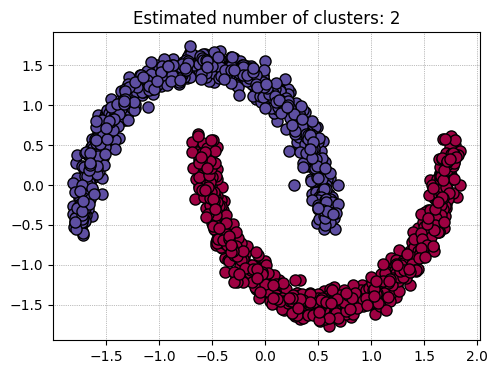

In [52]:
# Testcode

noisy_moons = datasets.make_moons(n_samples=1500, noise=.05, random_state=0)
X, labels_true = noisy_moons

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
# -----------------------------------------
db = DBSCAN(eps= 0.5, min_samples= 100)
# -----------------------------------------
db.fit_predict(X)
core_samples_mask = np.zeros_like(db.cluster_labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.cluster_labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
marksize_clustered = 8
marksize_noise = 4
plt.figure(figsize=(5.5, 4))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        marksize = marksize_noise
    else:
        marksize = marksize_clustered

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=marksize_clustered)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=marksize)

plt.grid(color = 'gray', linestyle = ':', linewidth = 0.5)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Estimated number of clusters: 2
Estimated number of noise points: 479


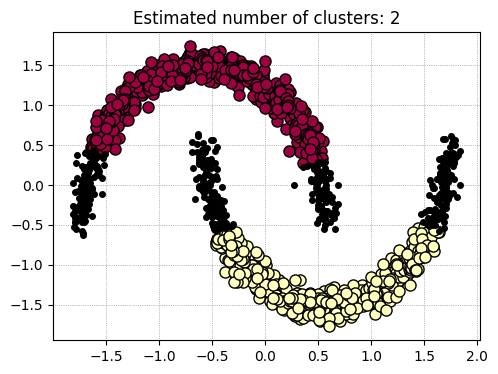

In [53]:
# Testcode

noisy_moons = datasets.make_moons(n_samples=1500, noise=.05, random_state=0)
X, labels_true = noisy_moons

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
# -----------------------------------------
db = DBSCAN(eps= 0.5, min_samples= 150)
# -----------------------------------------
db.fit_predict(X)
core_samples_mask = np.zeros_like(db.cluster_labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.cluster_labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
marksize_clustered = 8
marksize_noise = 4
plt.figure(figsize=(5.5, 4))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        marksize = marksize_noise
    else:
        marksize = marksize_clustered

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=marksize_clustered)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=marksize)

plt.grid(color = 'gray', linestyle = ':', linewidth = 0.5)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Estimated number of clusters: 4
Estimated number of noise points: 15


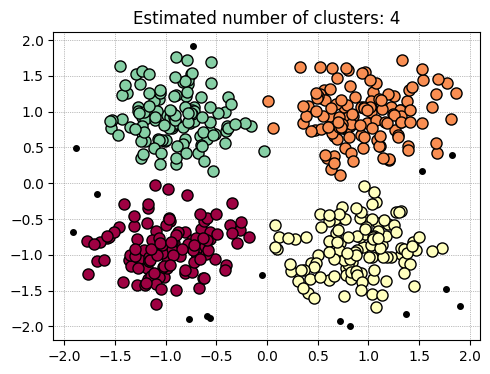

In [54]:
# Testcode

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1], [-1, 1]]
X, labels_true = make_blobs(n_samples=500, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
# -----------------------------------------
db = DBSCAN(eps=0.5, min_samples=40)
# -----------------------------------------
db.fit_predict(X)
core_samples_mask = np.zeros_like(db.cluster_labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.cluster_labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
marksize_clustered = 8
marksize_noise = 4
plt.figure(figsize=(5.5, 4))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        marksize = marksize_noise
    else:
        marksize = marksize_clustered

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=marksize_clustered)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=marksize)

plt.grid(color = 'gray', linestyle = ':', linewidth = 0.5)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Estimated number of clusters: 4
Estimated number of noise points: 72


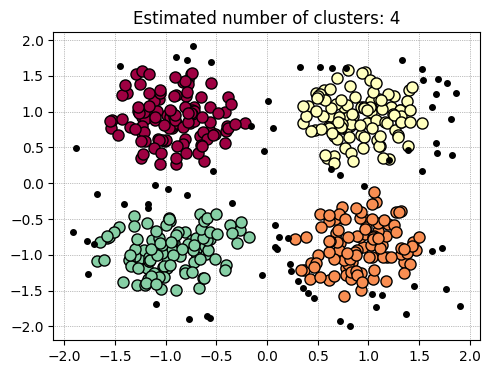

In [55]:
# Testcode

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1], [-1, 1]]
X, labels_true = make_blobs(n_samples=500, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# Compute DBSCAN
# -----------------------------------------
db = DBSCAN(eps=0.4, min_samples=40)
# -----------------------------------------
db.fit_predict(X)
core_samples_mask = np.zeros_like(db.cluster_labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.cluster_labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
marksize_clustered = 8
marksize_noise = 4
plt.figure(figsize=(5.5, 4))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        marksize = marksize_noise
    else:
        marksize = marksize_clustered

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=marksize_clustered)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=marksize)

plt.grid(color = 'gray', linestyle = ':', linewidth = 0.5)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## **TODO** : Answer the following questions (cleary write down your own explanation on your answer to get a full credit)

### **Q1.** What is the main difference between noise and border point?


### **Q2.** Do you think that the clustering results are deterministic even if the visiting order is changed? If you do not think so, find the values of eps and MinPts that produce different clustering results depending on the visiting order for the given dataset below, and describe why the results are different.

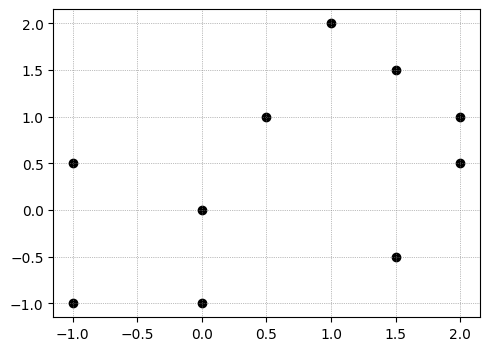

In [56]:
# Generate sample data
X = np.array([[-1, -1], [0, 0], [0, -1], [-1, 0.5], [1, 2], [0.5, 1], [1.5, 1.5], [1.5, -0.5], [2, 1], [2, 0.5]])

plt.figure(figsize=(5.5, 4))
plt.grid(color = 'gray', linestyle = ':', linewidth = 0.5)
plt.scatter(X[:, 0], X[:, 1], color='k')
plt.show()

**You can use the testcode below for Q2**

Estimated number of clusters: 2
Estimated number of noise points: 3


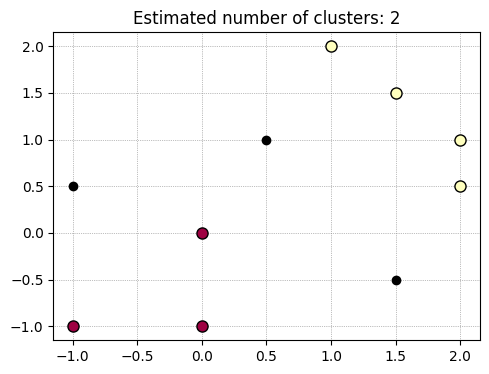

In [65]:
# Testcode
np.random.seed(12)
# Compute DBSCAN
# -----------------------------------------
db = DBSCAN(eps=1.1, min_samples=3)
# -----------------------------------------
db.fit_predict(X)
core_samples_mask = np.zeros_like(db.cluster_labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.cluster_labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
marksize_clustered = 8
marksize_noise = 6
plt.figure(figsize=(5.5, 4))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        marksize = marksize_noise
    else:
        marksize = marksize_clustered

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=marksize_clustered)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=marksize)

plt.grid(color = 'gray', linestyle = ':', linewidth = 0.5)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Estimated number of clusters: 2
Estimated number of noise points: 5


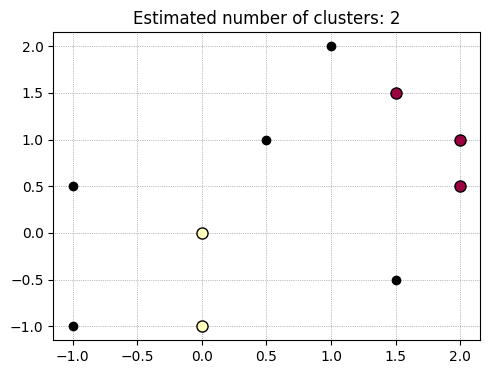

In [66]:
# Testcode
np.random.seed(13)
# Compute DBSCAN
# -----------------------------------------
db = DBSCAN(eps=1.1, min_samples=3)
# -----------------------------------------
db.fit_predict(X)
core_samples_mask = np.zeros_like(db.cluster_labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.cluster_labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# Plot result
# Black removed and is used for noise instead.
marksize_clustered = 8
marksize_noise = 6
plt.figure(figsize=(5.5, 4))
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
        marksize = marksize_noise
    else:
        marksize = marksize_clustered

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=marksize_clustered)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=marksize)

plt.grid(color = 'gray', linestyle = ':', linewidth = 0.5)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### **Q3.** Let us slightly modify the algorithm (in `fit_predict` method) as follows:

### From
```python
        while np.any(self.cluster_labels == 0):               # repeat until there's no point that has not been visited any more
            p_idx = self.pick_arbitrary_point()               # pick arbitrary point among not-visited points
            if self.is_core_sample(p_idx):                    # check if it is core sample
                self.current_label += 1                       # define new cluster label for current visiting
                self.visit_all_successive_neighbors(p_idx)    # visit all the neighbors and label them in succession
            else:
                self.cluster_labels[p_idx] = -1               # label it as noise if it is not a core sample in the first place

        return self.cluster_labels
```
### to 
```python
        while np.any(self.cluster_labels == 0):               # repeat until there's no point that has not been visited any more
            p_idx = self.pick_arbitrary_point()               # pick arbitrary point among not-visited points
            if self.is_core_sample(p_idx):                    # check if it is core sample
                self.current_label += 1                       # define new cluster label for current visiting
                self.visit_all_successive_neighbors(p_idx)    # visit all the neighbors and label them in succession
            else:
                self.cluster_labels[p_idx] = -1               # label it as noise if it is not a core sample in the first place
                self.labeled_indices.add(p_idx)               # mark it as labeled point (Hence, you don't relabel this point again later)

        return self.cluster_labels
```
### Then, what is the possible range of number of noise samples after the clustering is completed? **(write down in general form and express it using the number of differnt types of points(e.g. core, noise) which are assumed to be obtained in orignal DBSCAN.  The modified version runs with the same and fixed eps, MinPts that the original one used)**

## **Part 2.** Numpy Implementation of **autograd**, **torch-like Tensor** and **Module**

The objective of this part is to understand how the mechanism of autograd in APIs (pytorch, tensorflow, etc) actually work. How to obtain the gradients of all of the parameters computed through such exceedingly complicated computations? Some people use this beautifully well-made APIs as a 'blackbox' when studying, implementing or even doing research on something. However, it is very important to understant what's going on (even if it's not that deep) inside this blackbox when you run some simulations, make use of third party's source code and even understand it. I hope this assignment will be of some help to your future study. 

In [ ]:
import numpy as np
import os 
from urllib import request
import gzip
from tqdm import tqdm
import matplotlib.pyplot as plt
import math
import random

#### **Implementing 'torch-like Tensor' by subclassing Numpy array**

The following code is for impelementing torch-like tensor by subclassing the numpy ndarray to add some desired attributes(e.g. grad, backward_fn) and  mimic the pytorch's autograd mechanism. **The attribute 'grad' is for keeping and accumulating the gradients and 'backward_fn' is for tracking all the computations with corresponding backward function.** All the backward functions will be called consecutively all at once when `loss.backward()` is called

In [ ]:
class Tensor(np.ndarray):

    def __new__(cls, input_array, requires_grad=False):
        obj = np.asarray(input_array).view(cls)
        obj.grad = None
        obj.requires_grad = requires_grad
        lambda_fn = lambda x: 0 if x is None else x
        obj.backward_fn = lambda leaf_grad: setattr(obj, 'grad', lambda_fn(obj.grad) + leaf_grad) if requires_grad else lambda *args: None
        return obj

    def __array_finalize__(self, obj):
        if obj is None: return
        self.grad = getattr(obj, 'grad', None)
        self.requires_grad = getattr(obj, 'requires_grad', None)
        self.backward_fn = getattr(obj, 'backward_fn', None)

    def backward(self, *args):
        self.backward_fn(*args)

**Usage**

You can make **Tensor** by wrapping ```ndarray``` with the ```Tensor()``` class

In [ ]:
array = np.random.randn(2, 3)
print(array.__repr__(), end='\n\n')

mytensor = Tensor(array) # wrap it with Tensor class
print(mytensor.__repr__())

array([[-1.28170699, -0.37599788, -0.59416867],
       [ 0.69154571, -0.48351954, -0.27238992]])

Tensor([[-1.28170699, -0.37599788, -0.59416867],
        [ 0.69154571, -0.48351954, -0.27238992]])


**You can use all of the operations and methods which are supported by numpy package**

In [ ]:
addition = mytensor + mytensor
power_two = mytensor ** 2
max_zero = np.maximum(mytensor, 0)

addition, power_two, max_zero

(Tensor([[-2.56341397, -0.75199576, -1.18833733],
         [ 1.38309143, -0.96703909, -0.54477985]]),
 Tensor([[1.6427728 , 0.1413744 , 0.3530364 ],
         [0.47823547, 0.23379115, 0.07419627]]),
 Tensor([[0.        , 0.        , 0.        ],
         [0.69154571, 0.        , 0.        ]]))

**The following descriptive figure is for understanding how autograd computes the gradient.**

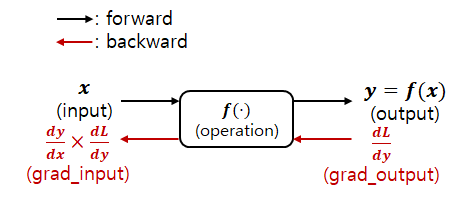

Backward function must be defined for all the forward operations like below. Pytorch package already implemented all the backward for all the basic vector/matrix operation. However, you can define the forward/backward "in chunk" containing multiple operations, not "basic operation level" (see below).

The following example is for implementing three basic operation (scalar addition, multiplication, power of two) using "closure" technique (see https://www.learnpython.org/en/Closures for details). The forward/backward function will be implemented as the following form.

```python
def forward(input):
    output = forward_operation(input)

    def backward(grad_output -> if required):
        grad_input = corresponding_backward_function(grad_output)
        input.backward_fn(grad_input)

    output.backward_fn = backward
    return output
```

 Corresponding backward function is attached to attribute "backward_fn" of the output Tensor when computing the forward operation. And then all these backward functions will be called consecutively. **(Note that if input is leaf variable, backward_fn just saves gradient in .grad attributes (or accumulate). See above code of Tensor class)**.

Now, let's consider the following example.

$f(a, b) = (a^2 + 1)^2b^2$

Taking derivative it with respect to $a$ and $b$ gives

$\dfrac{\partial f}{\partial a} = 2(a^2 + 1)(2a)b^2$
and
$\dfrac{\partial f}{\partial b} = 2b(a^2 + 1)^2$

Thus, we can implement forward/backward of $f$ (w.r.t $a$, $b$) as follows:

In [ ]:
def f(a, b):
    output = (a ** 2 + 1) ** 2 * b ** 2

    def backward():
        grad_input_a = 2 * (a ** 2 + 1) * (2 * a) * b ** 2
        grad_input_b = 2 * b * (a ** 2 + 1) ** 2
        a.backward_fn(grad_input_a)
        b.backward_fn(grad_input_b)

    output.backward_fn = backward
    return output

Define 'a' and 'b' with 'required_grad = True' for tracking the computational graph. In this case, the backward_fn is for keeping/accumulating the gradient.

In [ ]:
a = Tensor(2, requires_grad=True)
b = Tensor(3, requires_grad=True)

out = f(a, b)
out.backward()

# check the output and gradient
out, a.grad, b.grad

(Tensor(225), Tensor(360), Tensor(150))

Althogh it is very simple yet effective way of obtaining the gradient, it may impossible to define all the corresponding backward function for each (possibly infinite number of) forward function. To get around this problem, we can decompse it into more basic level operations like addition, multiplication, etc. This is how autograd works. See below.

### **Task 1. Implment backward of the following operations:**

```add()``` : addition of two operands

```mul()``` : multiplication of two operands

Defualt argument in backward function is nothing but for the case of the last ```out.backward()``` call.

## **TODO1** : Fill in the blanks of the codes for **Task 1** and write your own description of the source code in your report. 

## **TODO2** : Attach the results in your report.

In [ ]:
# It computes the output using only "handcrafted" basic level operations!
def f(a, b):
    # (a^2 + 1)^2 x b^2 = (a^2 x b + b)^2
    c = mul(a, a)
    d = mul(c, b)
    e = add(d, b)
    output = mul(e, e)
    return output


# handcrafted basic level operations
# addition
def add(a, b):
    # fill in the blank --------------------------------------
    output = a+b
    # --------------------------------------------------------

    def backward(grad_output=1):
        # fill in the blank --------------------------------------
        grad_input_a = np.ones_like(a) * grad_output
        grad_input_b = np.ones_like(b) * grad_output
        a.backward_fn(grad_input_a)
        b.backward_fn(grad_input_b)
        # --------------------------------------------------------

    output.backward_fn = backward
    return output


# multiplication
def mul(a, b):
    # fill in the blank --------------------------------------
    output = a*b
    # --------------------------------------------------------

    def backward(grad_output=1):
        # fill in the blank --------------------------------------
        grad_input_a = b * grad_output
        grad_input_b = a * grad_output
        a.backward_fn(grad_input_a)
        b.backward_fn(grad_input_b)
        # --------------------------------------------------------

    output.backward_fn = backward
    return output

In [ ]:
# define 'a' and 'b' with 'required_grad = True' to track the computational graph. In this case, the backward_fn is for keeping/accumulating the gradient.
a = Tensor(2, requires_grad=True)
b = Tensor(3, requires_grad=True)

out = f(a, b)
out.backward()

# check the output and gradient
out, a.grad, b.grad

(Tensor(225), Tensor(360), Tensor(150))

backward() is called once more -> the gradients are accumulated

In [ ]:
out.backward()
out, a.grad, b.grad

(Tensor(225), Tensor(720), Tensor(300))

If the .requires_grad is False, the gradient will not be saved in corresponding variable,

In [ ]:
a = Tensor(2, requires_grad=True)
b = Tensor(3)

out = f(a, b)
out.backward()

out, a.grad, b.grad

(Tensor(225), Tensor(360), None)

## **TODO3** : Consider and implement the following function $f(x, y)$. Get the gradient of $f$ with respect to $x, y$ when $(x, y) = (1, 2)$. If there is any operation you want to use, feel free to define it just like how we defined `add()` and `mul()` functions above.

$$f(x, y) = \sin(x)(x+y)(x^3 + 1)$$


**Hint:** Use `np.sin, np.cos` methods when computing `sin()`.

In [ ]:
def g(x, y):
    # fill in the blank --------------------------------------
    #output = np.sin(x)*(x+y)*(x**3+1)
    # --------------------------------------------------------
    a = add(x,y)
    b = mul(x,x)
    c = mul(x,b)
    d = add(c,a)
    e = add(d,a)
    output = mul_sin(x,e)

    return output


# define operations here (if you think you need) -------------
# addition
def add(a, b):
    # fill in the blank --------------------------------------
    output = a+b
    # --------------------------------------------------------

    def backward(grad_output=1):
        # fill in the blank --------------------------------------
        grad_input_a = np.ones_like(a) * grad_output
        grad_input_b = np.ones_like(b) * grad_output
        a.backward_fn(grad_input_a)
        b.backward_fn(grad_input_b)
        # --------------------------------------------------------

    output.backward_fn = backward
    return output


# multiplication
def mul(a, b):
    # fill in the blank --------------------------------------
    output = a*b
    # --------------------------------------------------------

    def backward(grad_output=1):
        # fill in the blank --------------------------------------
        grad_input_a = b * grad_output
        grad_input_b = a * grad_output
        a.backward_fn(grad_input_a)
        b.backward_fn(grad_input_b)
        # --------------------------------------------------------

    output.backward_fn = backward
    return output

def mul_sin(x,y):
    output = np.sin(x)*y

    def backward(grad_output=1):
        grad_input_x = np.cos(x) * y
        grad_input_y = np.sin(x) * grad_output
        x.backward_fn(grad_input_x)
        y.backward_fn(grad_input_y)
    
    output.backward_fn = backward
    return output
# --------------------------------------------------------

In [ ]:
# define 'x' and 'y' with 'required_grad = True' to track the computational graph.
x = Tensor(1, requires_grad=True)
y = Tensor(2, requires_grad=True)

out = g(x, y)
out.backward()

# check the output and gradient
out, x.grad, y.grad

(Tensor(5.89029689), Tensor(7.98947107), Tensor(1.68294197))

#### **Implementing 'torch-like Module' to be inherited to customed modules**
It contains several useful methods and implemented compactly, trying to make it along the same line with `nn.Module` in pytorch. (except for the ```update``` method). See https://pytorch.org/docs/stable/generated/torch.nn.Module.html for details of each method usage.

Since all the effective SGD variants other than naive one is out of scope in this assignment, we will not investigate on 'torch-like optimizer'. Instead, we will make the 'Module' class absorb this update procedure in ```update``` method. Learning rate (```lr```) must be specified in every iteration as a method's argument.



### **Task 2. Implment ```zero_grad()``` and ```update()``` methods**

**hint:** use ```parameters()``` method.

## **TODO1** : Fill in the blanks of the codes for **Task 2** and write your own description of the source code in your report. 

## **TODO2** : Attach the results in your report.

In [ ]:
class Module:
    def __init__(self):
        self.training = True
        self._parameters = dict()
        self._modules = dict()

    def __setattr__(self, name, value):
        super(Module, self).__setattr__(name, value)
        if isinstance(value, Tensor) and value.requires_grad:
            self._parameters[name] = value
        elif isinstance(value, Module):
            self._modules[name] = value

    def modules(self):
        yield self
        for name, module in self._modules.items():
            if module is None:
                continue
            for m in module.modules():
                yield m
        
    def parameters(self):
        modules = self.modules()
        for module in modules:
            members = module._parameters.items()
            for k, v in members:
                yield v

    def zero_grad(self):
        # fill in the blank --------------------------------------
        pm = self.parameters()
        for i in pm:
            if isinstance(i.grad, Tensor):
                i.grad.fill(0)
            else:
                i.grad = np.zeros_like(i)
        # --------------------------------------------------------

    def update(self, lr):
        # fill in the blank --------------------------------------
        pm = self.parameters()
        for i in pm:
            i -= lr * (i.grad)
        # --------------------------------------------------------

    def train(self):
        for module in self.modules():
            module.training = True

    def eval(self):
        for module in self.modules():
            module.training = False

    def forward(self, *args):
        raise NotImplementedError

    def __call__(self, *args):
        return self.forward(*args)

**Usage**

You can subclass it when you implement the customed modules(e.g. relu, fc layer) as well as the full model which will be defined in the similar way with torch's Module.

In [ ]:
class TestModel(Module):
    def __init__(self, init_param):
        super(TestModel, self).__init__()
        self.some_param = Tensor(init_param, requires_grad=True)
    
    def forward(self, x):
        return f(self.some_param, x)  ## f is defined above in Part1-Task1
    
test_model = TestModel(12.)
out = test_model(Tensor(0.3))
out.backward()

print('gradient of some_param before zero_grad : ', test_model.some_param.grad)
print('some_param before update : ', test_model.some_param)
test_model.update(lr=0.01)
print('some_param after update : ', test_model.some_param)
test_model.zero_grad()
print('gradient of some_param after zero_grad : ', test_model.some_param.grad)

gradient of some_param before zero_grad :  626.3999999999999
some_param before update :  12.0
some_param after update :  5.7360000000000015
gradient of some_param after zero_grad :  0.0


#### **Recap Deep Neural Network (DNN) Training**

Let's recap deep neural network which was already covered in practice session meterial. In this sub-part, you will implement DNN model by using the above `Tensor, Model, Autograd mechanism`. You can fill in the blank based on the week 6 practice session meterial if you think you need. At first, some key modules (e.g. full-connected layer, ReLU activation) will be implemented and wrapping(using) them with a whole model which also must inherit the `Module` class. And then train with MNIST and CIFAR10 dataset to check the result.



#### **1. Training on MNIST Dataset**
#### **Load MNIST Dataset**

In [ ]:
#Download MNIST Dataset

if not os.path.exists('mnist'):
    os.mkdir('mnist')
# try:
mnist_url = "https://ossci-datasets.s3.amazonaws.com/mnist/"
files = ["train-images-idx3-ubyte.gz","t10k-images-idx3-ubyte.gz","train-labels-idx1-ubyte.gz","t10k-labels-idx1-ubyte.gz"]
for file in files: 
    if not os.path.isfile('mnist/'+file):
        request.urlretrieve(mnist_url+file, 'mnist/'+file)

#Prepare MNIST Dataset
with gzip.open('mnist/train-images-idx3-ubyte.gz', 'r') as f:
    magic_number = int.from_bytes(f.read(4), 'big')
    num_images_training = int.from_bytes(f.read(4), 'big')
    row_count = int.from_bytes(f.read(4), 'big')
    column_count = int.from_bytes(f.read(4), 'big')
    train_images_data = f.read()
    train_images = np.frombuffer(train_images_data, dtype=np.uint8).reshape(num_images_training, row_count, column_count)

with gzip.open('mnist/train-labels-idx1-ubyte.gz', 'r') as f:
    magic_number = int.from_bytes(f.read(4), 'big')
    label_count = int.from_bytes(f.read(4), 'big')
    train_labels_data = f.read()
    train_labels = np.frombuffer(train_labels_data, dtype=np.uint8)

with gzip.open('mnist/t10k-images-idx3-ubyte.gz', 'r') as f:
    magic_number = int.from_bytes(f.read(4), 'big')
    num_images_test = int.from_bytes(f.read(4), 'big')
    row_count = int.from_bytes(f.read(4), 'big')
    column_count = int.from_bytes(f.read(4), 'big')
    test_images_data = f.read()
    test_images = np.frombuffer(test_images_data, dtype=np.uint8).reshape(num_images_test, row_count, column_count)

with gzip.open('mnist/t10k-labels-idx1-ubyte.gz', 'r') as f:
    magic_number = int.from_bytes(f.read(4), 'big')
    label_count = int.from_bytes(f.read(4), 'big')
    test_labels_data = f.read()
    test_labels = np.frombuffer(test_labels_data, dtype=np.uint8) 

train_images = Tensor(train_images / 255.)
test_images = Tensor(test_images / 255.)
train_labels = Tensor(train_labels)
test_labels = Tensor(test_labels)

print("Training Images Shape:" , train_images.shape)
print("Training Labels Shape:" ,train_labels.shape)
print("Test Images Shape:" ,test_images.shape)
print("Test Labels Shape:" ,test_labels.shape)

Training Images Shape: (60000, 28, 28)
Training Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


The following model is desired to be trained on MNIST dataset at the end of this sub-part, and as you can see the below cell, you need to implement the following modules:

`Linear`, `ReLU`

The usage of these modules are exactly the same with that of pytorch.

In [ ]:
class Model(Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = Linear(784, 320)
        self.fc2 = Linear(320, 120)
        self.fc3 = Linear(120, 10)
        self.relu = ReLU()

    def forward(self, x):
        x = x.reshape(x.shape[0], -1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### **Task 3. Implement the ReLU, Linear modules(with backward)**

### **Task 4. Implement CrossEntropyLoss(with backward) to define appropriate criterion before training**



## **TODO1** : Fill in the blanks of the codes for **Task 3, 4** and write your own description of the source code in your report. 

## **TODO2** : Attach the results in your report.

**Note: It is not necessary to break down the operations within each module into more basic operations (backward operations can be defined together in a single backward closure).**

In [ ]:
class ReLU(Module):
    def __init__(self):
        super(ReLU, self).__init__()

    def forward(self, x):
        return relu_function(x)


def relu_function(input):
    # fill in the blank --------------------------------------
    output = np.maximum(0, input)
    # --------------------------------------------------------
    def backward(grad_output):
        # fill in the blank --------------------------------------
        grad_input_input = grad_output * ((np.sign(input) + 1) / 2)
        input.backward_fn(grad_input_input)
        # --------------------------------------------------------
    output.backward_fn = backward
    return output

In [ ]:
class Linear(Module):
    def __init__(self, in_features, out_features):
        super(Linear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.init_parameters()

    def init_parameters(self):
        W = np.random.randn(self.in_features, self.out_features) * math.sqrt(2 / (6 * self.in_features))
        bound = 1 / math.sqrt(self.in_features)
        b = np.random.uniform(-bound, bound, size=(self.out_features))
        self.W = Tensor(W, requires_grad=True)
        self.b = Tensor(b, requires_grad=True)

    def forward(self, x):
        return wx_plus_b(self.W, self.b, x)


def wx_plus_b(W, b, input):
    # fill in the blank --------------------------------------
    output = np.matmul(input, W) + b
    # --------------------------------------------------------

    def backward(grad_output):
        # fill in the blank --------------------------------------
        grad_input_W = np.matmul(input.T, grad_output)
        grad_input_b = np.matmul(np.ones(len(input)), grad_output)
        grad_input_input = np.matmul(grad_output, W.T)
        W.backward_fn(grad_input_W)
        b.backward_fn(grad_input_b)
        input.backward_fn(grad_input_input)
        # --------------------------------------------------------

    output.backward_fn = backward
    return output

**Implement CrossEntropyLoss which combines `LogSoftmax` and `NLL Loss` as pytorch's one does.**

(see https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)

In [ ]:
class CrossEntropyLoss: 
    def __call__(self, input, target):
        return compute_cross_entropy_loss(input, target)


def compute_cross_entropy_loss(input, target):
    # fill in the blank --------------------------------------
    output = 0
    length = len(input)
    for i in range(length):
        tar = target[i]
        input_item = input[i]
        output += (np.log(np.sum(np.exp(input_item))) - input_item[tar])
    output = Tensor((output/length), requires_grad = True)
    # --------------------------------------------------------

    def backward():
        # fill in the blank --------------------------------------
        grad_input_input = np.exp(input)
        sum1 = np.sum(grad_input_input, axis = 1)
        for i in range(len(grad_input_input)):
            grad_input_input[i] /= sum1[i]
            grad_input_input[i][target[i]] -= 1
        grad_input_input /= len(input)
        input.backward_fn(grad_input_input)
        # --------------------------------------------------------

    output.backward_fn = backward
    return output

#### **Training and Evaluation**

In [ ]:
np.random.seed(2023)
random.seed(2023)

model = Model()
criterion = CrossEntropyLoss()

epoch = 20
batch_size = 100
assert len(train_images) % batch_size == 0
lr = 0.1
for i in tqdm(range(epoch)):
    indices = np.arange(len(train_images))
    np.random.shuffle(indices)
    train_images_shuffle = train_images[indices]
    train_labels_shuffle = train_labels[indices]
    running_loss = 0.0
    for num_batch in range(len(train_images) // batch_size):
        imgs = train_images_shuffle[num_batch * batch_size:(num_batch + 1) * batch_size]
        target = train_labels_shuffle[num_batch * batch_size:(num_batch + 1) * batch_size]
        output = model(imgs)
        loss = criterion(output, target)
        model.zero_grad()
        loss.backward()
        model.update(lr)
        running_loss += loss      
    print('Loss = {}'.format(running_loss/(num_batch + 1)))
print('Training Finished')

  5%|▌         | 1/20 [00:07<02:22,  7.50s/it]

Loss = 0.5976743977352439


 10%|█         | 2/20 [00:15<02:24,  8.02s/it]

Loss = 0.23216241042671143


 15%|█▌        | 3/20 [00:24<02:20,  8.25s/it]

Loss = 0.16636484746362962


 20%|██        | 4/20 [00:31<02:06,  7.88s/it]

Loss = 0.1268566726499497


 25%|██▌       | 5/20 [00:41<02:08,  8.57s/it]

Loss = 0.10148149223319261


 30%|███       | 6/20 [00:50<01:59,  8.55s/it]

Loss = 0.083579199833649


 35%|███▌      | 7/20 [00:58<01:48,  8.37s/it]

Loss = 0.06984142115224735


 40%|████      | 8/20 [01:05<01:37,  8.17s/it]

Loss = 0.05945913935479037


 45%|████▌     | 9/20 [01:14<01:30,  8.22s/it]

Loss = 0.05101464342146573


 50%|█████     | 10/20 [01:21<01:20,  8.01s/it]

Loss = 0.043736275121405654


 55%|█████▌    | 11/20 [01:30<01:13,  8.14s/it]

Loss = 0.03853626425128526


 60%|██████    | 12/20 [01:38<01:06,  8.35s/it]

Loss = 0.03293278904273675


 65%|██████▌   | 13/20 [01:46<00:56,  8.10s/it]

Loss = 0.02836972512710277


 70%|███████   | 14/20 [01:54<00:48,  8.16s/it]

Loss = 0.02437575441870696


 75%|███████▌  | 15/20 [02:03<00:41,  8.26s/it]

Loss = 0.02112507069193561


 80%|████████  | 16/20 [02:10<00:31,  7.99s/it]

Loss = 0.018087014489237628


 85%|████████▌ | 17/20 [02:19<00:24,  8.19s/it]

Loss = 0.015290462560477147


 90%|█████████ | 18/20 [02:27<00:16,  8.26s/it]

Loss = 0.013133806469908119


 95%|█████████▌| 19/20 [02:34<00:07,  7.97s/it]

Loss = 0.01143620774238661


100%|██████████| 20/20 [02:43<00:00,  8.16s/it]

Loss = 0.009546901877568377
Training Finished


In [ ]:
prediction = model(test_images)
prediction_label = np.argmax(prediction, axis=1)
test_acc = np.sum((prediction_label == test_labels))/len(test_labels)
print('Test Accuracy = {:.2f}'.format(100*test_acc))

Test Accuracy = 97.95


#### **2. Training on CIFAR-10 Dataset**
#### **Load CIFAR-10 Dataset**

We will extract only 4 classes out of 10 to be classified and train model on these classes.

In [ ]:
#Download CIFAR10 Dataset
from urllib import request
import pickle

request.urlretrieve('https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz', 'cifar-10-python.tar.gz')
!tar -xzf cifar-10-python.tar.gz

for i in range(1,6):
    filename='data_batch_%d'%i
    with open('cifar-10-batches-py/'+filename, 'rb') as fo:
        dict_data = pickle.load(fo, encoding='bytes')
  
    images_batch = dict_data[b'data']
    labels_batch = dict_data[b'labels']
    if i==1:
        train_images = images_batch
        train_labels = labels_batch
    else:
        train_images = np.concatenate((train_images, images_batch), axis=0)
        train_labels.extend(labels_batch)
        
with open('cifar-10-batches-py/test_batch', 'rb') as fo:
    dict_data = pickle.load(fo, encoding='bytes')

test_images = dict_data[b'data']
test_labels = dict_data[b'labels']

train_indexes = sorted(range(len(train_labels)), key=lambda k: train_labels[k])
test_indexes = sorted(range(len(test_labels)), key=lambda k: test_labels[k])

def cifar10_subset(class_ind=[0,1]):
    assert (len(class_ind) >=2 and len(class_ind) <=10)
    assert (min(class_ind) >=0 and max(class_ind) <=9)
    train_images_cl = []
    train_labels_cl = []
    test_images_cl = []
    test_labels_cl = []
    for i in class_ind:
        train_inds = train_indexes[i*5000:(i+1)*5000]
        test_inds = test_indexes[i*1000:(i+1)*1000]
        train_images_tmp = train_images[train_inds,:]
        train_labels_tmp = np.array(train_labels)[train_inds]
        test_images_tmp = test_images[test_inds,:]
        test_labels_tmp = np.array(test_labels)[test_inds]

        train_images_cl.append(train_images_tmp)
        train_labels_cl.append(train_labels_tmp)
        test_images_cl.append(test_images_tmp)
        test_labels_cl.append(test_labels_tmp)
  
    return np.concatenate(train_images_cl), np.array(train_labels_cl), np.concatenate(test_images_cl), np.array(test_labels_cl)

X_train, Y_train, X_test, Y_test = cifar10_subset([0, 1, 2, 3])  # four classes

train_images = Tensor(X_train / 255.)
test_images = Tensor(X_test / 255.)
train_labels = Tensor(Y_train.reshape(-1))
test_labels = Tensor(Y_test.reshape(-1))

print("Training Images Shape:" , train_images.shape)
print("Training Labels Shape:" ,train_labels.shape)
print("Test Images Shape:" ,test_images.shape)
print("Test Labels Shape:" ,test_labels.shape)

Training Images Shape: (20000, 3072)
Training Labels Shape: (20000,)
Test Images Shape: (4000, 3072)
Test Labels Shape: (4000,)


#### **Define the model which will be trained on CIFAR-10**

In [ ]:
class Model(Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = Linear(3072, 640)
        self.fc2 = Linear(640, 320)
        self.fc3 = Linear(320, 64)
        self.fc4 = Linear(64, 4)
        self.relu = ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

#### **Training and Evaluation**

In [ ]:
np.random.seed(2023)
random.seed(2023)

model = Model()
criterion = CrossEntropyLoss()

epoch = 30
batch_size = 100
assert len(train_images) % batch_size == 0
lr = 0.1
for i in tqdm(range(epoch)):
    indices = np.arange(len(train_images))
    np.random.shuffle(indices)
    train_images_shuffle = train_images[indices]
    train_labels_shuffle = train_labels[indices]
    running_loss = 0.0
    for num_batch in range(len(train_images) // batch_size):
        imgs = train_images_shuffle[num_batch * batch_size:(num_batch + 1) * batch_size]
        target = train_labels_shuffle[num_batch * batch_size:(num_batch + 1) * batch_size]
        output = model(imgs)
        loss = criterion(output, target)
        model.zero_grad()
        loss.backward()
        model.update(lr)
        running_loss += loss      
    print('Loss = {}'.format(running_loss/(num_batch + 1)))
print('Training Finished')

  3%|▎         | 1/30 [00:13<06:42, 13.90s/it]

Loss = 1.2501769376149994


  7%|▋         | 2/30 [00:26<06:10, 13.24s/it]

Loss = 1.0862850909627255


 10%|█         | 3/30 [00:39<05:49, 12.94s/it]

Loss = 1.0049301720904598


 13%|█▎        | 4/30 [00:51<05:34, 12.86s/it]

Loss = 0.958731983690068


 17%|█▋        | 5/30 [01:04<05:19, 12.78s/it]

Loss = 0.915227189887724


 20%|██        | 6/30 [01:17<05:05, 12.75s/it]

Loss = 0.8848178772743067


 23%|██▎       | 7/30 [01:30<04:53, 12.75s/it]

Loss = 0.857701375251709


 27%|██▋       | 8/30 [01:42<04:40, 12.76s/it]

Loss = 0.8273987409935036


 30%|███       | 9/30 [01:55<04:26, 12.71s/it]

Loss = 0.8141616321745703


 33%|███▎      | 10/30 [02:08<04:13, 12.67s/it]

Loss = 0.7982399799587785


 37%|███▋      | 11/30 [02:20<03:59, 12.60s/it]

Loss = 0.7739239559279664


 40%|████      | 12/30 [02:33<03:47, 12.63s/it]

Loss = 0.7558615322478633


 43%|████▎     | 13/30 [02:45<03:34, 12.63s/it]

Loss = 0.7426419413849787


 47%|████▋     | 14/30 [02:58<03:22, 12.66s/it]

Loss = 0.723870224748847


 50%|█████     | 15/30 [03:13<03:18, 13.21s/it]

Loss = 0.7083480561703793


 53%|█████▎    | 16/30 [03:25<03:03, 13.14s/it]

Loss = 0.6916700329117275


 57%|█████▋    | 17/30 [03:38<02:49, 13.03s/it]

Loss = 0.6777476989397124


 60%|██████    | 18/30 [03:51<02:35, 12.95s/it]

Loss = 0.669508563986773


 63%|██████▎   | 19/30 [04:04<02:21, 12.90s/it]

Loss = 0.6558168276207672


 67%|██████▋   | 20/30 [04:16<02:08, 12.82s/it]

Loss = 0.6390514231481427


 70%|███████   | 21/30 [04:29<01:54, 12.78s/it]

Loss = 0.6276787011966038


 73%|███████▎  | 22/30 [04:42<01:42, 12.83s/it]

Loss = 0.6317610089621198


 77%|███████▋  | 23/30 [04:55<01:30, 12.86s/it]

Loss = 0.6037212862613907


 80%|████████  | 24/30 [05:08<01:17, 12.91s/it]

Loss = 0.5890756478380667


 83%|████████▎ | 25/30 [05:21<01:04, 12.89s/it]

Loss = 0.5795452528782566


 87%|████████▋ | 26/30 [05:34<00:51, 12.89s/it]

Loss = 0.5717600703309638


 90%|█████████ | 27/30 [05:47<00:38, 12.89s/it]

Loss = 0.559497171412907


 93%|█████████▎| 28/30 [05:59<00:25, 12.87s/it]

Loss = 0.5433470543067526


 97%|█████████▋| 29/30 [06:12<00:12, 12.80s/it]

Loss = 0.5405198060483031


100%|██████████| 30/30 [06:25<00:00, 12.85s/it]

Loss = 0.5173837133636979
Training Finished


In [ ]:
prediction = model(test_images)
prediction_label = np.argmax(prediction, axis=1)
test_acc = np.sum((prediction_label == test_labels))/len(test_labels)
print('Test Accuracy = {:.2f}'.format(100*test_acc))

Test Accuracy = 72.97
